#### Exploratory Data Analysis (EDA) & Data Preprocessing:et.

In [1]:
import pandas as pd

# Load the datasets
test = pd.read_csv(r"C:\Users\Parvathy Shine\Desktop\Assignments\15. XGBM & LGBM\XGBM & LGBM\Titanic_test.csv") #Test data
train = pd.read_csv(r"C:\Users\Parvathy Shine\Desktop\Assignments\15. XGBM & LGBM\XGBM & LGBM\Titanic_train.csv") #Training data

# Calculate the mean of the 'survived' column in the training dataset
mean_survived = train['Survived'].mean()

# Create the 'survived' column in the test dataset and fill it with the mean
test['survived'] = mean_survived

# Merge the datasets
df = pd.concat([train, test], ignore_index=True)

# Display the merged dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  survived  
0      0         A/5 21171   7.2500   NaN        S       NaN  
1      0          PC 17599  71.2833   C85        C       NaN  
2      0  STON/O2. 3101282   7.9250   NaN        S       NaN  
3      0            113803  53.1000  C123        S       NaN  
4    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  survived     418 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB


In [3]:
# Checking for missing values
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64


In [4]:
# Handling the missing values by Imputing:

from sklearn.impute import SimpleImputer

# For 'age' , use median imputation
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# For 'embarked'
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']])

#For Fare
fare_imputer = SimpleImputer(strategy='median')
df['Fare'] = fare_imputer.fit_transform(df[['Fare']])

# Drop 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop columns that are less useful or redundant
df.drop(columns=['Name', 'Ticket','PassengerId'], inplace=True)

# Confirm no missing values remain except 'survival' 
print(df.isnull().sum())

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
survived    891
dtype: int64


In [5]:
# Create a single survival column that uses Survived if present, otherwise survived
df['Survival'] = df['Survived'].combine_first(df['survived'])

# Drop the old columns
df.drop(columns=['Survived', 'survived'], inplace=True)

# Check missing values again
print(df['Survival'].isnull().sum()) 

df['Survival'] = df['Survival'].astype(int) #Changing the float values to interger
df.head()

0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


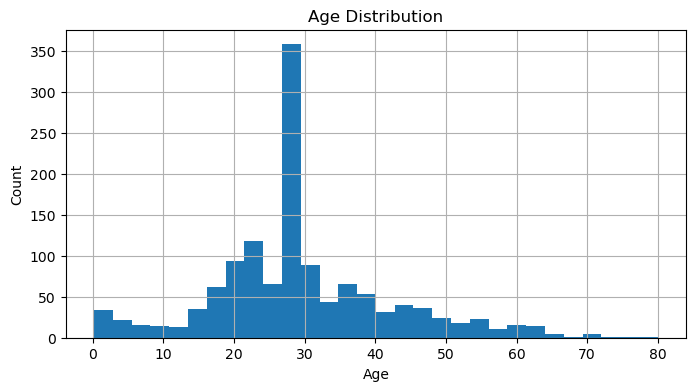

In [6]:
# Visualize Age distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

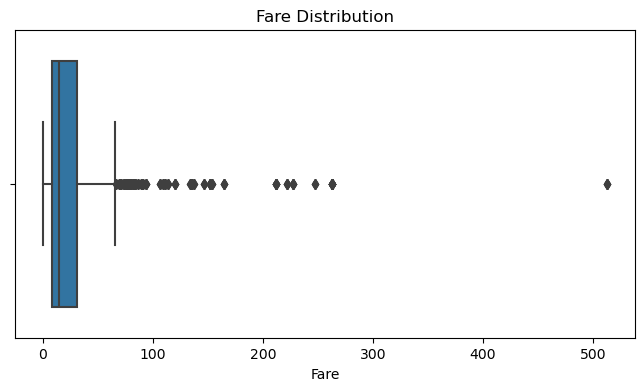

In [7]:
# Boxplot for Fare
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x='Fare', data=df)
plt.title('Fare Distribution')
plt.show()

AGE vs SURVIVAL


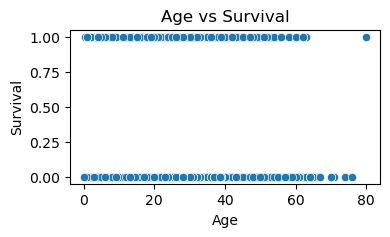

In [8]:
# Visualize relationships between features and survival 

#AGE VS SURVIVAL
print("AGE vs SURVIVAL")
plt.figure(figsize=(4,2))
sns.scatterplot(x='Age', y='Survival', data=df)
plt.title('Age vs Survival')
plt.show()

SEX vs SURVIVAL


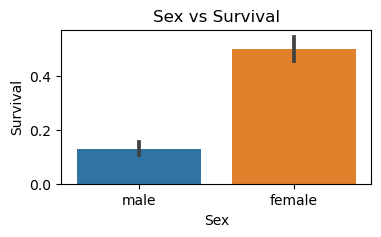

In [9]:
# SEX vs SURVIVAL

print("SEX vs SURVIVAL")
plt.figure(figsize=(4, 2))
sns.barplot(x='Sex', y='Survival', data=df)
plt.title('Sex vs Survival')
plt.show()

In [10]:
df.info() # We have to deal with the categorical columns

# Here 'sex' and 'emabarked' are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survival  1309 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 76.8+ KB


In [11]:
# Encoding categorical values:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) 
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

# We skip standard scaling since we are using tree models like XGBM and LGBM

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [12]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
1304,3,1,28.0,0,0,8.0500,2,0
1305,1,0,39.0,0,0,108.9000,0,0
1306,3,1,38.5,0,0,7.2500,2,0
1307,3,1,28.0,0,0,8.0500,2,0


#### Building Predictive Models:

In [13]:
# Create training and testing
from sklearn.model_selection import train_test_split

X = df.drop('Survival', axis=1) #Features
y = df['Survival'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a resusable evaluvation matrix:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [15]:
# Building an LGB model:

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [16]:
pip install -U scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Building an XGB model:

import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [18]:
# Calculating both the evaluvation matrix:

print("LightGBM Evaluation:")
evaluate_model(lgb_model, X_test, y_test)

print("XGBoost Evaluation:")
evaluate_model(xgb_model, X_test, y_test)


LightGBM Evaluation:
Accuracy: 0.7290076335877863
Precision: 0.5138888888888888
Recall: 0.5068493150684932
F1 Score: 0.5103448275862069

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       189
           1       0.51      0.51      0.51        73

    accuracy                           0.73       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.73      0.73      0.73       262

XGBoost Evaluation:
Accuracy: 0.7519083969465649
Precision: 0.5571428571428572
Recall: 0.5342465753424658
F1 Score: 0.5454545454545454

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       189
           1       0.56      0.53      0.55        73

    accuracy                           0.75       262
   macro avg       0.69      0.69      0.69       262
weighted avg       0.75      0.75      0.75       262



In [19]:
# Using GridSearch cv with Lightgbm

from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [20, 31, 50], #Controls the complexity , More leaves=more complexity
    'max_depth': [-1, 10, 20], # deep the tree can grow [-1 - no limit]
    'learning_rate': [0.001,0.01, 0.1], #how fast the model Learns
    'n_estimators': [50,100, 200] #Number of boosting rounds
}   #Hyperparameter Tuning

grid_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42),
                        param_grid=param_grid,
                        cv=5,   # 5-fold cross-validation
                        scoring='f1', # Optimizing for F1 score (good for imbalanced data)
                        verbose=1,  # Print progress
                        n_jobs=-1)  #Cross-Validation

grid_lgb.fit(X_train, y_train) # Start the training and cross-validation to find the best paramters
print("Best LightGBM Params:", grid_lgb.best_params_)

evaluate_model(grid_lgb.best_estimator_, X_test, y_test) #Evaluvate the best model from the gridsearch on the test set.

#Got slighly better model performance

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

#### Comparative Analysis:

In [20]:
# Comparing both the evaluvation matrix:

print("LightGBM Evaluation:")
evaluate_model(lgb_model, X_train, y_train)

print("XGBoost Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

LightGBM Evaluation:
Accuracy: 0.9474689589302769
Precision: 0.9314516129032258
Recall: 0.8587360594795539
F1 Score: 0.8936170212765957

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       778
           1       0.93      0.86      0.89       269

    accuracy                           0.95      1047
   macro avg       0.94      0.92      0.93      1047
weighted avg       0.95      0.95      0.95      1047

XGBoost Evaluation:
Accuracy: 0.7519083969465649
Precision: 0.5571428571428572
Recall: 0.5342465753424658
F1 Score: 0.5454545454545454

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       189
           1       0.56      0.53      0.55        73

    accuracy                           0.75       262
   macro avg       0.69      0.69      0.69       262
weighted avg       0.75      0.75      0.75       262



In [21]:
# XG boost is better at detecting positive class( better recall and F1 score)
#LGBM is faster to train and preferred for large datasets.

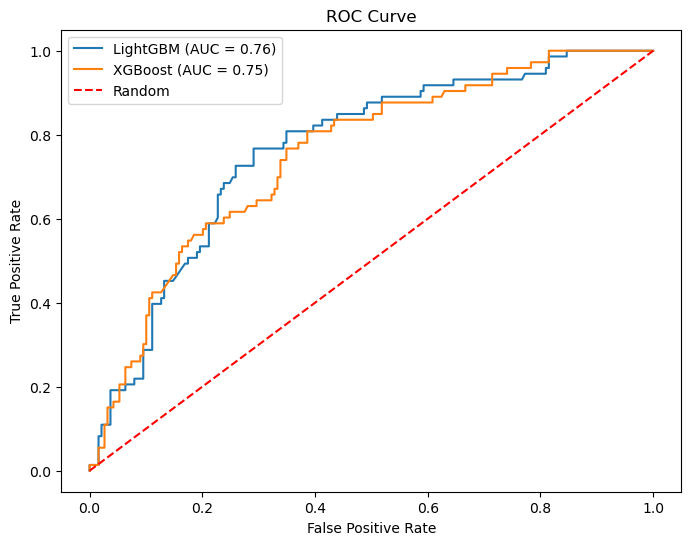

In [22]:
#Importing neccesary packages
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating ROC curve and AU

# LightGBM
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
lgb_auc = auc(lgb_fpr, lgb_tpr)

# XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()